In [1]:
from mysql.connector import connect
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns#
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import TomekLinks

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
df.shape

(9134, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
df = df.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [9]:
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [11]:
categorical_columns = df.select_dtypes(include=['object'])

In [12]:
categorical_columns

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [13]:
categorical_columns =categorical_columns.drop(columns='customer')

In [14]:
categorical_columns 

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [15]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
categorical_columns = df.select_dtypes(include=['object'])

In [16]:
print("Numerical DataFrame:")
print(numerical_df.head())

Numerical DataFrame:
   customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0          

In [17]:
categorical_columns

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [18]:
print("\nCategorical DataFrame:")
print(categorical_columns.head())



Categorical DataFrame:
  customer       state response  coverage education effective_to_date  \
0  BU79786  Washington       No     Basic  Bachelor           2/24/11   
1  QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2  AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3  WW63253  California       No     Basic  Bachelor           1/20/11   
4  HB64268  Washington       No     Basic  Bachelor            2/3/11   

  employmentstatus gender location_code marital_status     policy_type  \
0         Employed      F      Suburban        Married  Corporate Auto   
1       Unemployed      F      Suburban         Single   Personal Auto   
2         Employed      F      Suburban        Married   Personal Auto   
3       Unemployed      M      Suburban        Married  Corporate Auto   
4         Employed      M         Rural         Single   Personal Auto   

         policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0  Corporate L3

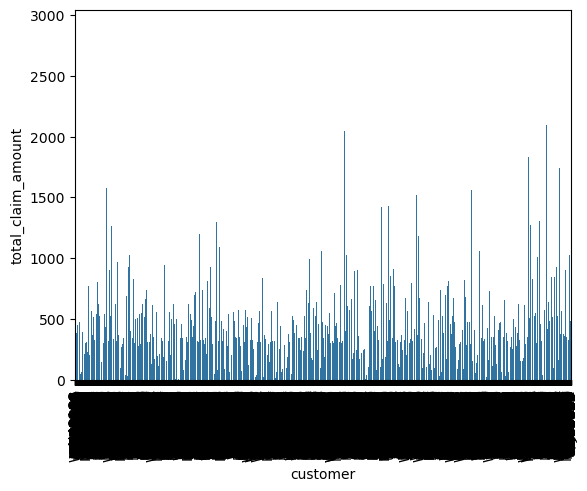

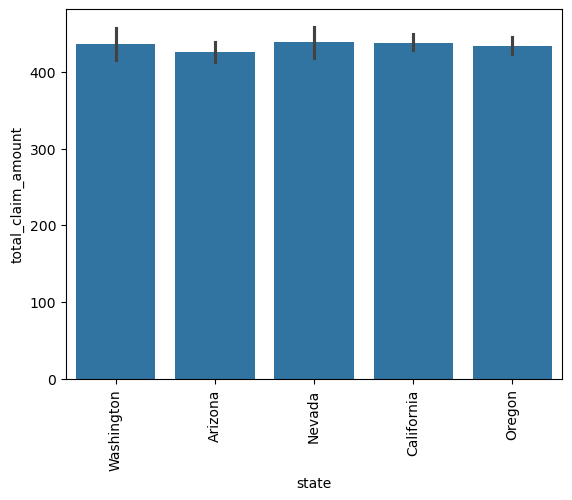

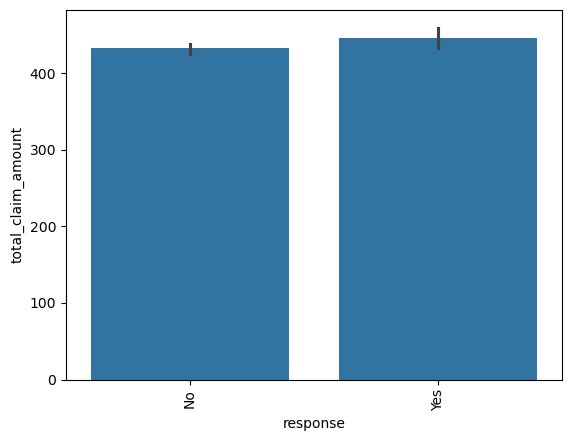

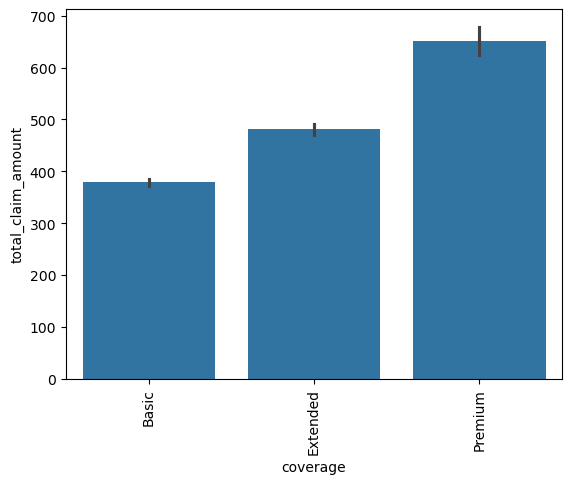

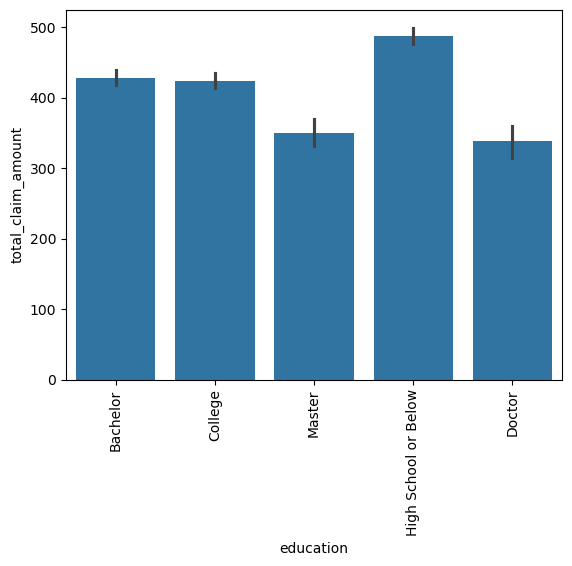

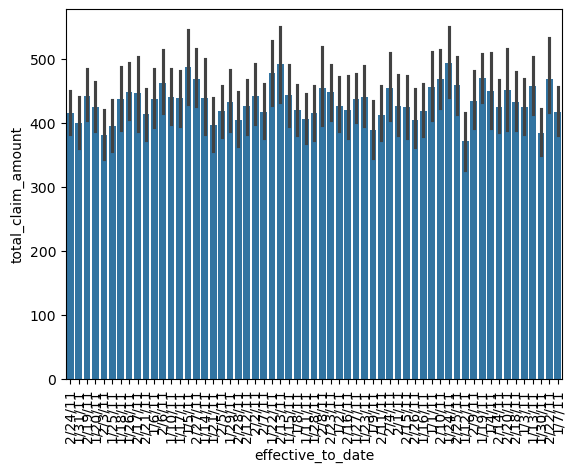

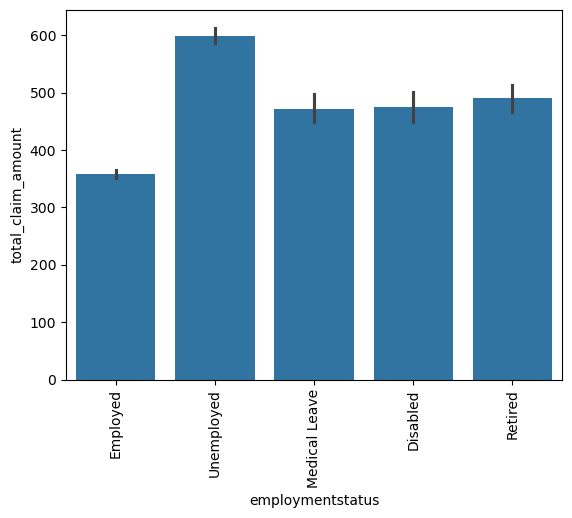

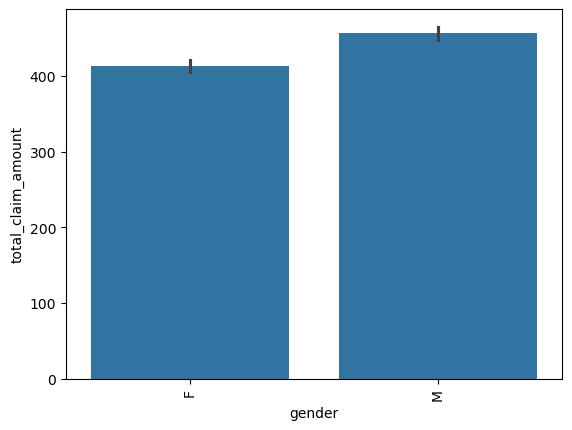

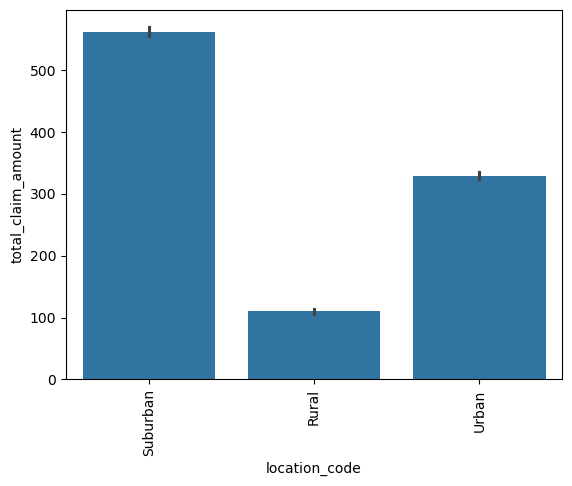

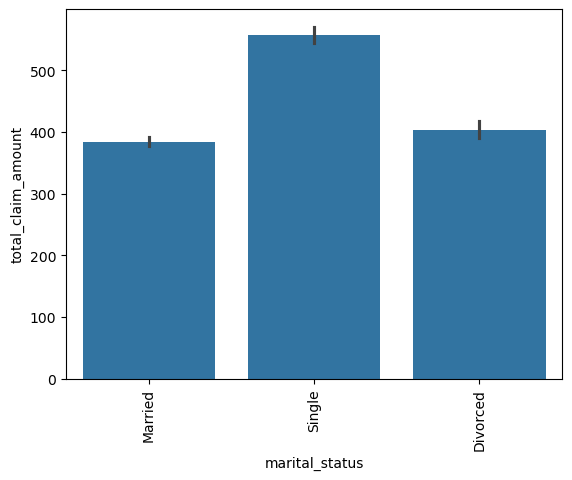

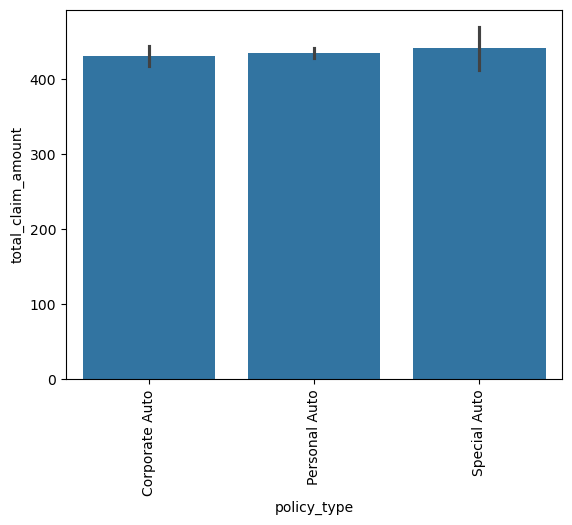

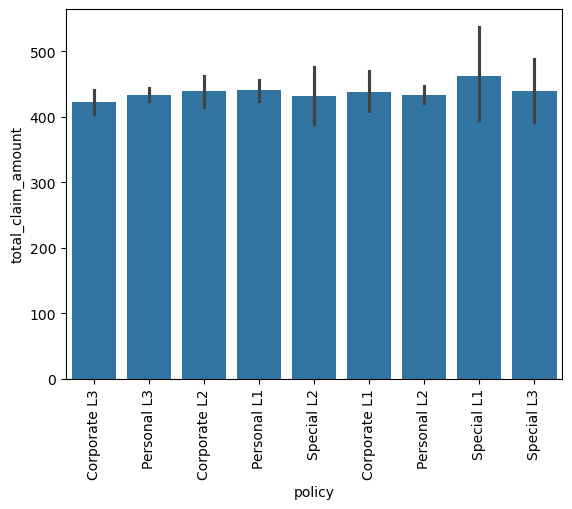

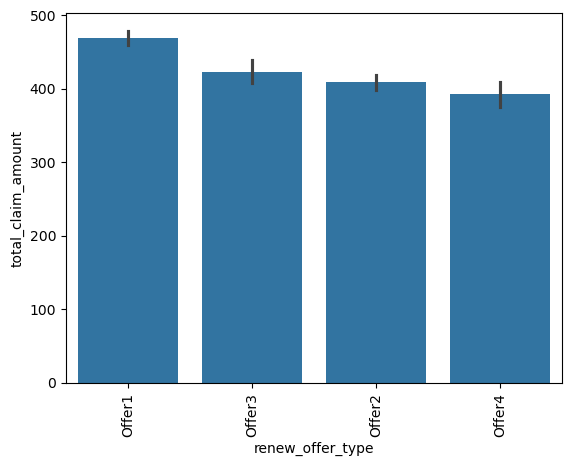

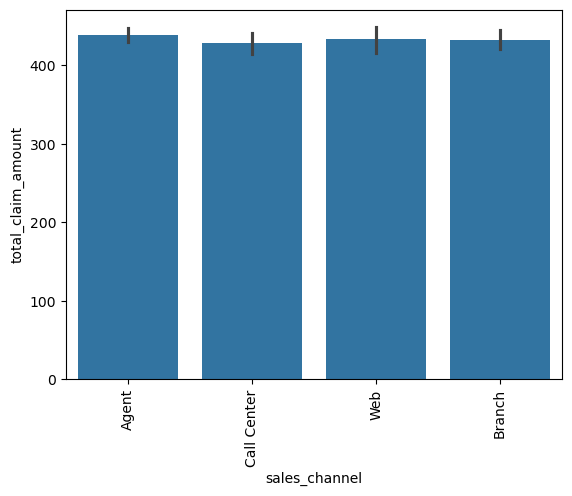

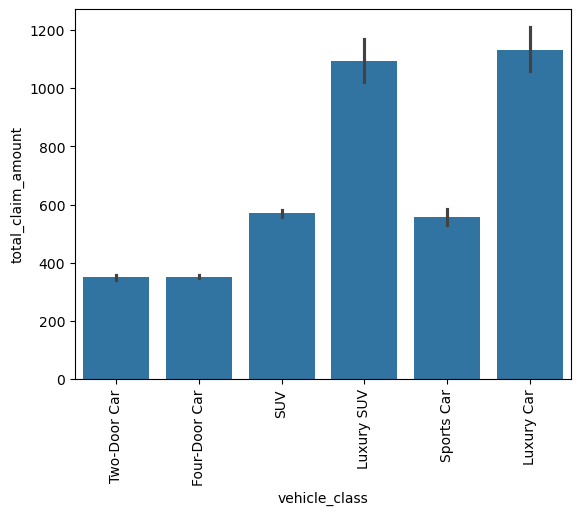

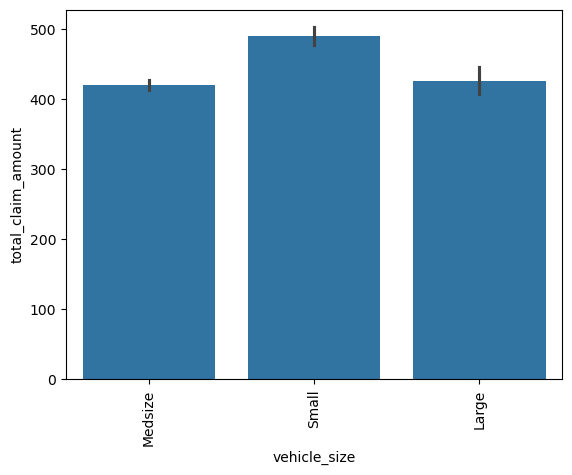

In [19]:
for col in categorical_columns.columns:
  sns.barplot(x=categorical_columns[col], y=df["total_claim_amount"])
  plt.xticks(rotation=90)
  plt.show()

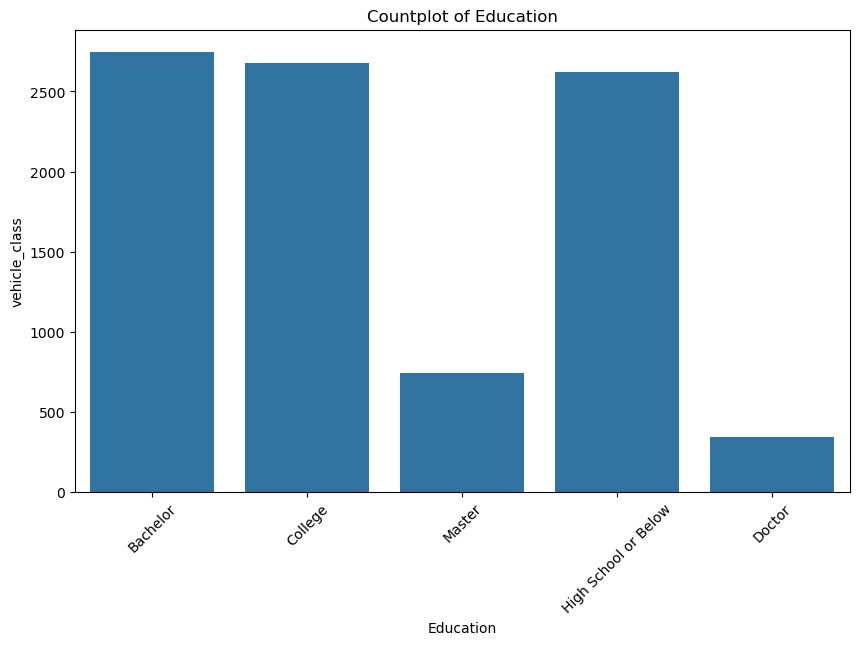

In [20]:


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education')
plt.title('Countplot of Education')
plt.xlabel('Education')
plt.ylabel('vehicle_class')
plt.xticks(rotation=45)
plt.show()


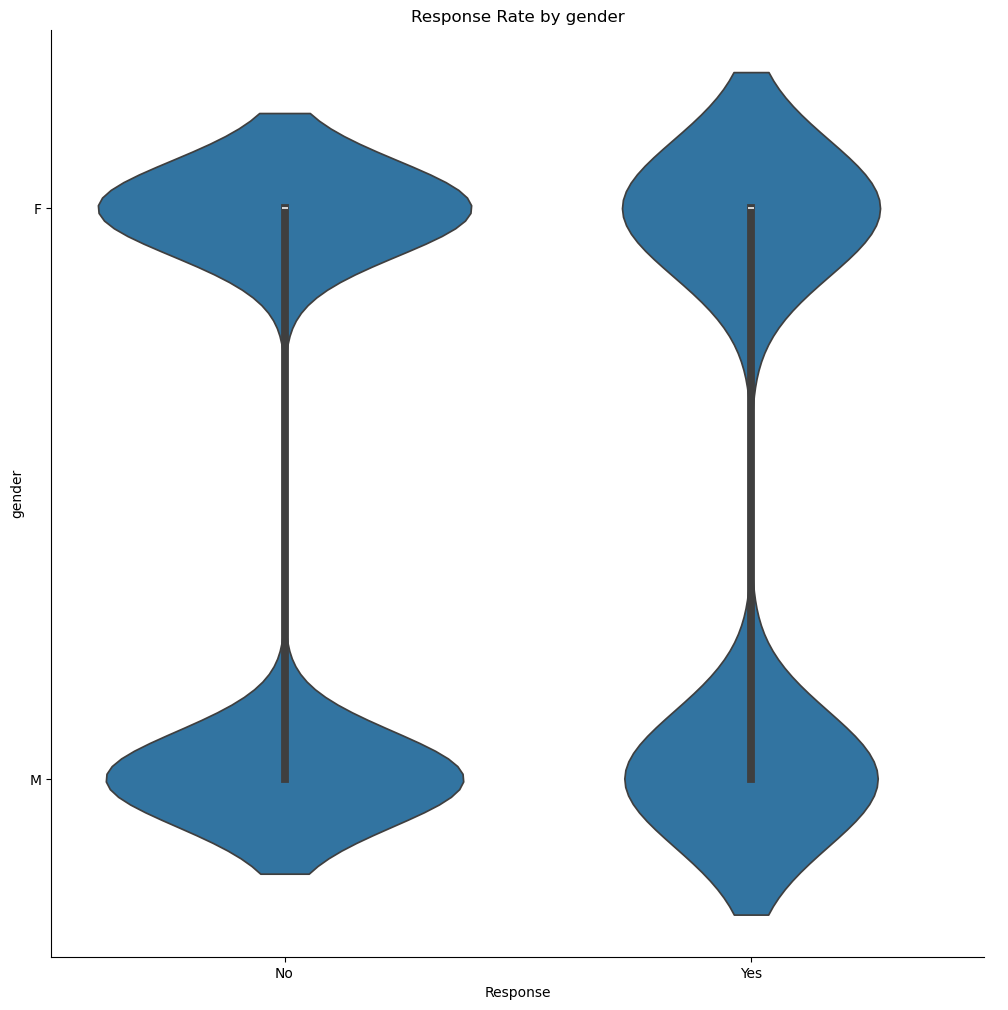

In [21]:

sns.catplot(x='response', y='gender', data=df, kind="violin", height=10)


plt.title('Response Rate by gender')
plt.xlabel('Response')
plt.ylabel('gender')

plt.show()


<Axes: xlabel='response', ylabel='count'>

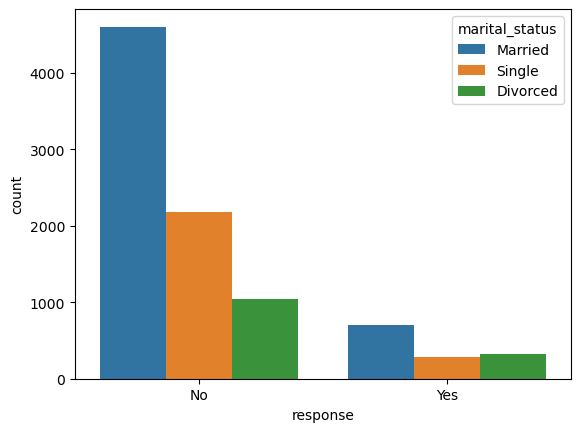

In [22]:
sns.countplot(x="response", hue="marital_status" , data = df)

In [23]:
categorical_columns.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [24]:
for col in categorical_columns.columns:
    print(categorical_columns[col].value_counts())
    print("/")

customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64
/
state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
/
response
No     7826
Yes    1308
Name: count, dtype: int64
/
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
/
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
/
effective_to_date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    1

In [25]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [26]:
#for col in categorical.columns:
    #if col != "effective_to_date":
      #  sns.histplot(categorical[col])
      #  plt.xticks(rotation = 20)
       # plt.show()

#Barplot

<Axes: xlabel='gender', ylabel='coverage'>

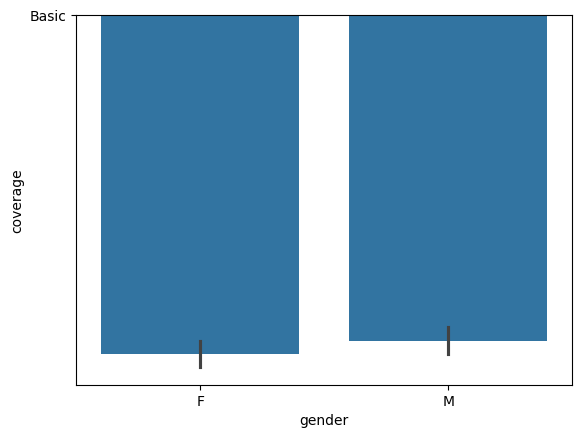

In [27]:
sns.barplot(x='gender',y='coverage',data=categorical_columns)

#Countplot

<Axes: xlabel='response', ylabel='count'>

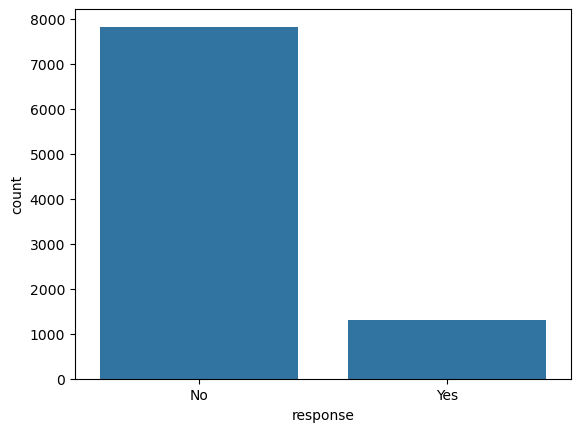

In [28]:
sns.countplot(x='response',data=categorical_columns)

#Boxplot and Violinplot

#Boxplot

<Axes: xlabel='gender', ylabel='marital_status'>

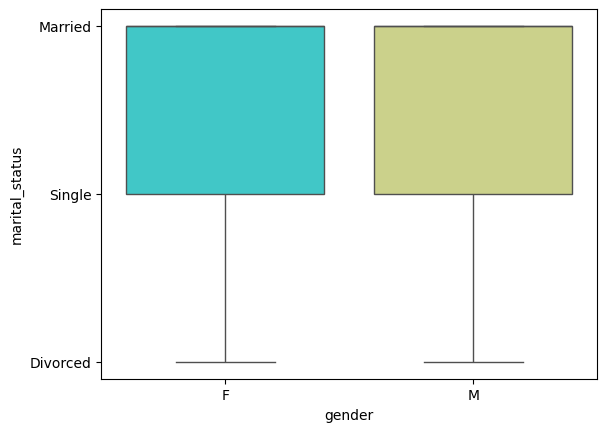

In [29]:
sns.boxplot(x="gender", y="marital_status", data=categorical_columns,palette='rainbow')

<Axes: >

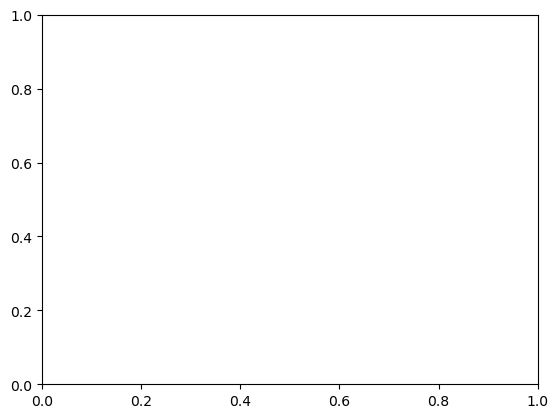

In [30]:
sns.boxplot(data=categorical_columns,palette='rainbow',orient='h')

<Axes: xlabel='vehicle_class', ylabel='marital_status'>

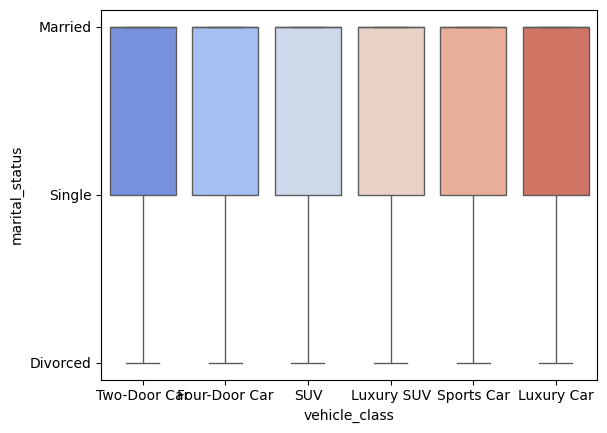

In [31]:
sns.boxplot(x="vehicle_class", y="marital_status",data=categorical_columns, palette="coolwarm")

#Violinplot

<Axes: xlabel='education', ylabel='marital_status'>

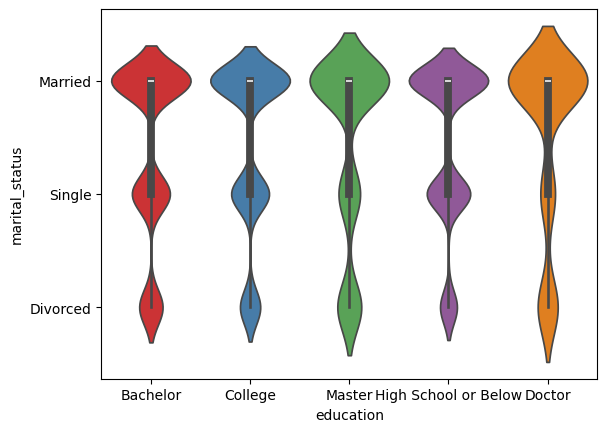

In [32]:
sns.violinplot(x="education", y="marital_status", data=categorical_columns,hue='education',palette='Set1')

<Axes: xlabel='education', ylabel='marital_status'>

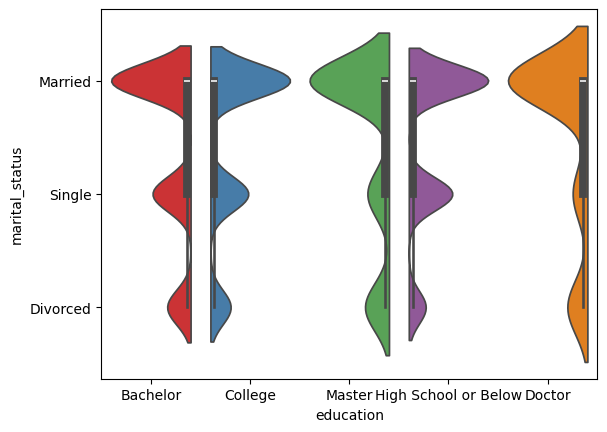

In [33]:
sns.violinplot(x="education", y="marital_status", data=categorical_columns,hue='education',split=True,palette='Set1')

#Stripplot and Swarmplot

     #Stripplot

In [34]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [35]:
print(categorical_columns["policy_type"].unique())

['Corporate Auto' 'Personal Auto' 'Special Auto']


In [36]:
print(categorical_columns["policy"].unique())

['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']


olumns that seem to be redundant are "policy" and "policy_type" , we can drop one of them because one will give both result

In [37]:
categorical_columns = categorical_columns.drop(["policy"], axis = 1)
categorical_columns

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


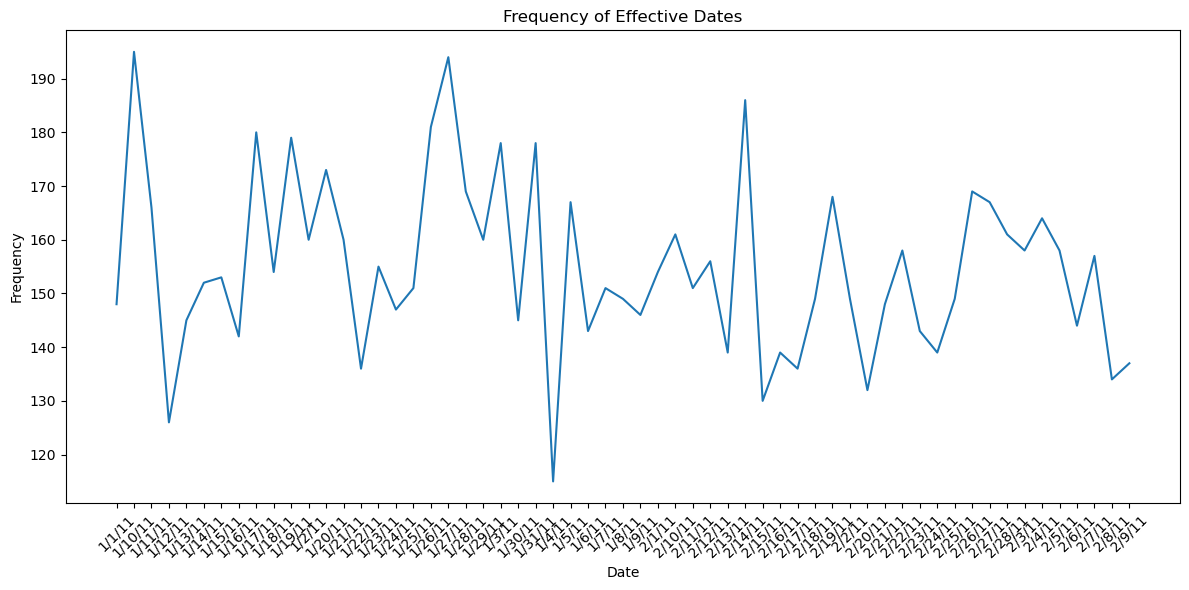

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=categorical_columns["effective_to_date"].value_counts().sort_index())
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Frequency of Effective Dates')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


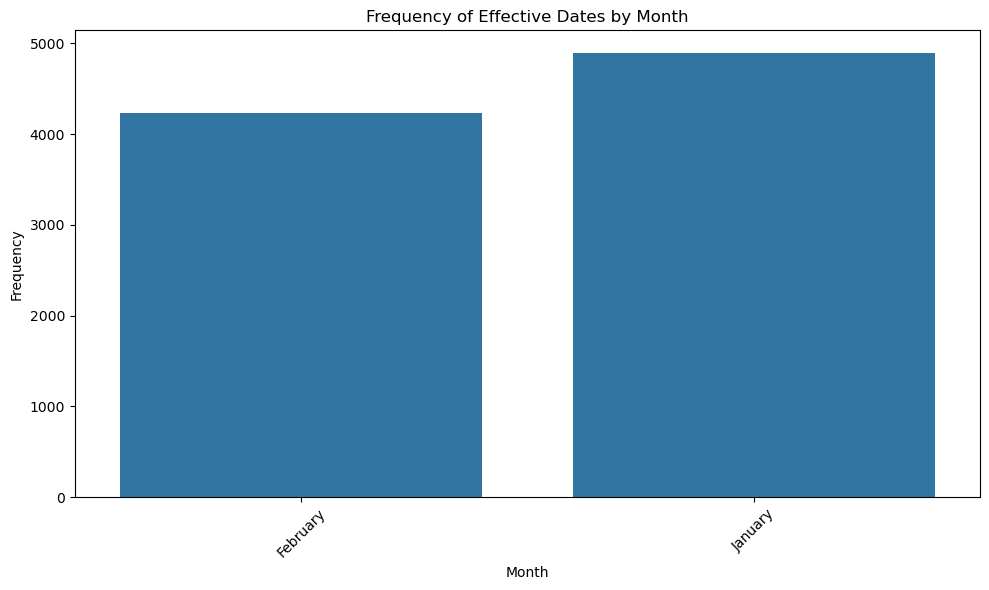

In [39]:

categorical_columns['effective_to_date'] = pd.to_datetime(categorical_columns['effective_to_date'])

months = categorical_columns['effective_to_date'].dt.month_name()
monthly_counts = months.value_counts().sort_index()

# Plot the frequency of each month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Effective Dates by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


lab_data_cleaning_and_wrangling

In [40]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
outliers

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9130,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9131,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
9132,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:

df_no_outliers = df_numeric[(np.abs(stats.zscore(df_numeric)) < 3).all(axis=1)]
df_no_outliers

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


In [42]:
print("Original DataFrame:")
print(df)

Original DataFrame:
     customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  \
0     Bachelor           2/24/11   

In [43]:
print("\nDataFrame with outliers removed:")
print(df_no_outliers)


DataFrame with outliers removed:
Empty DataFrame
Columns: [customer, state, customer_lifetime_value, response, coverage, education, effective_to_date, employmentstatus, gender, income, location_code, marital_status, monthly_premium_auto, months_since_last_claim, months_since_policy_inception, number_of_open_complaints, number_of_policies, policy_type, policy, renew_offer_type, sales_channel, total_claim_amount, vehicle_class, vehicle_size]
Index: []


In [44]:
df_copy = df

In [45]:
df_copy

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [46]:
df_copy_numerical = df_copy.select_dtypes(include='number')
df_copy_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [47]:

X = df_copy_numerical.drop(['total_claim_amount'], axis=1)
y = df_copy_numerical["total_claim_amount"]

transformer = Normalizer()
x_normalized = transformer.fit_transform(X)

X_train_norm, X_test_norm, y_train, y_test = train_test_split(x_normalized, y, test_size=0.20, random_state=42)
print("Normalized Training Data (X_train_norm):")
print(X_train_norm)

print("\nNormalized Testing Data (X_test_norm):")
print(X_test_norm)

Normalized Training Data (X_train_norm):
[[9.28428096e-02 9.95679711e-01 1.18755792e-03 ... 6.22981205e-04
  1.94681627e-05 1.75213464e-04]
 [9.99514618e-01 0.00000000e+00 2.79257264e-02 ... 8.83725518e-03
  0.00000000e+00 3.53490207e-04]
 [3.58954414e-02 9.99354790e-01 9.11898769e-04 ... 8.25638075e-04
  0.00000000e+00 1.23229563e-05]
 ...
 [9.99895682e-01 0.00000000e+00 1.43433460e-02 ... 4.44754916e-04
  0.00000000e+00 7.78321103e-04]
 [9.99947515e-01 0.00000000e+00 9.49698776e-03 ... 3.82612457e-03
  0.00000000e+00 1.36647306e-04]
 [4.28540670e-02 9.99080656e-01 1.07466546e-03 ... 1.66317274e-04
  0.00000000e+00 1.27936364e-05]]

Normalized Testing Data (X_test_norm):
[[5.65244348e-02 9.98399992e-01 1.41892336e-03 ... 6.55917405e-04
  0.00000000e+00 1.33860695e-05]
 [2.31074112e-01 9.72931453e-01 2.97519740e-03 ... 4.19041887e-04
  0.00000000e+00 1.67616755e-04]
 [4.00941791e-02 9.99195334e-01 9.89688012e-04 ... 4.00086643e-04
  0.00000000e+00 1.05285959e-05]
 ...
 [5.18081887e-02 

In [48]:
df_copy_categorical = df_copy.select_dtypes(include='object')
df_copy_categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [49]:
df_copy_categorical = df_copy_categorical.drop(columns='customer')
df_copy_categorical

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [50]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

categories_encoded = one_hot_encoder.fit_transform(df_copy_categorical)
df_encoded = pd.DataFrame(categories_encoded.todense(), columns=one_hot_encoder.get_feature_names_out(df_copy_categorical.columns))

In [51]:
df_encoded

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,effective_to_date_1/1/11,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,effective_to_date_1/13/11,effective_to_date_1/14/11,effective_to_date_1/15/11,effective_to_date_1/16/11,effective_to_date_1/17/11,effective_to_date_1/18/11,effective_to_date_1/19/11,effective_to_date_1/2/11,effective_to_date_1/20/11,effective_to_date_1/21/11,effective_to_date_1/22/11,effective_to_date_1/23/11,effective_to_date_1/24/11,effective_to_date_1/25/11,effective_to_date_1/26/11,effective_to_date_1/27/11,effective_to_date_1/28/11,effective_to_date_1/29/11,effective_to_date_1/3/11,effective_to_date_1/30/11,effective_to_date_1/31/11,effective_to_date_1/4/11,effective_to_date_1/5/11,effective_to_date_1/6/11,effective_to_date_1/7/11,effective_to_date_1/8/11,effective_to_date_1/9/11,effective_to_date_2/1/11,effective_to_date_2/10/11,effective_to_date_2/11/11,effective_to_date_2/12/11,effective_to_date_2/13/11,effective_to_date_2/14/11,effective_to_date_2/15/11,effective_to_date_2/16/11,effective_to_date_2/17/11,effective_to_date_2/18/11,effective_to_date_2/19/11,effective_to_date_2/2/11,effective_to_date_2/20/11,effective_to_date_2/21/11,effective_to_date_2/22/11,effective_to_date_2/23/11,effective_to_date_2/24/11,effective_to_date_2/25/11,effective_to_date_2/26/11,effective_to_date_2/27/11,effective_to_date_2/28/11,effective_to_date_2/3/11,effective_to_date_2/4/11,effective_to_date_2/5/11,effective_to_date_2/6/11,effective_to_date_2/7/11,effective_to_date_2/8/11,effective_to_date_2/9/11,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0

In [52]:
df_copy

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [53]:
df_copy['effective_to_date'] = pd.to_datetime(df_copy['effective_to_date'])

df_day = df_copy['effective_to_date'].dt.day_name()
df_day.value_counts()

effective_to_date
Monday       1530
Saturday     1397
Sunday       1330
Thursday     1249
Friday       1245
Wednesday    1221
Tuesday      1162
Name: count, dtype: int64

In [54]:
df_copy['effective_to_date'] = pd.to_datetime(df_copy['effective_to_date'])

months = df_copy['effective_to_date'].dt.month_name()
months.value_counts()

effective_to_date
January     4898
February    4236
Name: count, dtype: int64

In [55]:
df_copy['effective_to_date'] = pd.to_datetime(df_copy['effective_to_date'])

df_year = df_copy['effective_to_date'].dt.year

year_counts = df_year.value_counts()

print(year_counts)

effective_to_date
2011    9134
Name: count, dtype: int64


In [56]:
df_encoded

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,effective_to_date_1/1/11,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,effective_to_date_1/13/11,effective_to_date_1/14/11,effective_to_date_1/15/11,effective_to_date_1/16/11,effective_to_date_1/17/11,effective_to_date_1/18/11,effective_to_date_1/19/11,effective_to_date_1/2/11,effective_to_date_1/20/11,effective_to_date_1/21/11,effective_to_date_1/22/11,effective_to_date_1/23/11,effective_to_date_1/24/11,effective_to_date_1/25/11,effective_to_date_1/26/11,effective_to_date_1/27/11,effective_to_date_1/28/11,effective_to_date_1/29/11,effective_to_date_1/3/11,effective_to_date_1/30/11,effective_to_date_1/31/11,effective_to_date_1/4/11,effective_to_date_1/5/11,effective_to_date_1/6/11,effective_to_date_1/7/11,effective_to_date_1/8/11,effective_to_date_1/9/11,effective_to_date_2/1/11,effective_to_date_2/10/11,effective_to_date_2/11/11,effective_to_date_2/12/11,effective_to_date_2/13/11,effective_to_date_2/14/11,effective_to_date_2/15/11,effective_to_date_2/16/11,effective_to_date_2/17/11,effective_to_date_2/18/11,effective_to_date_2/19/11,effective_to_date_2/2/11,effective_to_date_2/20/11,effective_to_date_2/21/11,effective_to_date_2/22/11,effective_to_date_2/23/11,effective_to_date_2/24/11,effective_to_date_2/25/11,effective_to_date_2/26/11,effective_to_date_2/27/11,effective_to_date_2/28/11,effective_to_date_2/3/11,effective_to_date_2/4/11,effective_to_date_2/5/11,effective_to_date_2/6/11,effective_to_date_2/7/11,effective_to_date_2/8/11,effective_to_date_2/9/11,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0

In [57]:
from sklearn.preprocessing import LabelEncoder
for col in df_copy_numerical.columns:
    label_encoder = LabelEncoder()
    df_copy[col+'_encoded'] = label_encoder.fit_transform(df_copy[col])
    
df_copy

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,customer_lifetime_value_encoded,income_encoded,monthly_premium_auto_encoded,months_since_last_claim_encoded,months_since_policy_inception_encoded,number_of_open_complaints_encoded,number_of_policies_encoded,total_claim_amount_encoded
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,975,3322,8,32,5,0,0,2941
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,4659,0,32,13,42,0,7,4880
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,6900,2820,46,18,38,0,1,3897
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,5140,0,44,18,65,0,6,3764
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1058,2510,12,12,44,0,0,1138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,7701,4331,12,18,89,0,1,1564
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1390,551,17,14,28,0,0,2902
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,5516,0,23,9,37,3,1,4538
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,5041,589,34,34,3,0,2,4304


Lab  Comparing regression models.

In [58]:
from sklearn.model_selection import train_test_split

In [59]:

X = df_copy_numerical.drop(['total_claim_amount'], axis=1)
y = df_copy_numerical["total_claim_amount"]

transformer = Normalizer()
x_normalized = transformer.fit_transform(X)

X_train_norm, X_test_norm, y_train, y_test = train_test_split(x_normalized, y, test_size=0.20, random_state=42)
print("Normalized Training Data (X_train_norm):")
print(X_train_norm)

print("\nNormalized Testing Data (X_test_norm):")
print(X_test_norm)

Normalized Training Data (X_train_norm):
[[9.28428096e-02 9.95679711e-01 1.18755792e-03 ... 6.22981205e-04
  1.94681627e-05 1.75213464e-04]
 [9.99514618e-01 0.00000000e+00 2.79257264e-02 ... 8.83725518e-03
  0.00000000e+00 3.53490207e-04]
 [3.58954414e-02 9.99354790e-01 9.11898769e-04 ... 8.25638075e-04
  0.00000000e+00 1.23229563e-05]
 ...
 [9.99895682e-01 0.00000000e+00 1.43433460e-02 ... 4.44754916e-04
  0.00000000e+00 7.78321103e-04]
 [9.99947515e-01 0.00000000e+00 9.49698776e-03 ... 3.82612457e-03
  0.00000000e+00 1.36647306e-04]
 [4.28540670e-02 9.99080656e-01 1.07466546e-03 ... 1.66317274e-04
  0.00000000e+00 1.27936364e-05]]

Normalized Testing Data (X_test_norm):
[[5.65244348e-02 9.98399992e-01 1.41892336e-03 ... 6.55917405e-04
  0.00000000e+00 1.33860695e-05]
 [2.31074112e-01 9.72931453e-01 2.97519740e-03 ... 4.19041887e-04
  0.00000000e+00 1.67616755e-04]
 [4.00941791e-02 9.99195334e-01 9.89688012e-04 ... 4.00086643e-04
  0.00000000e+00 1.05285959e-05]
 ...
 [5.18081887e-02 

Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


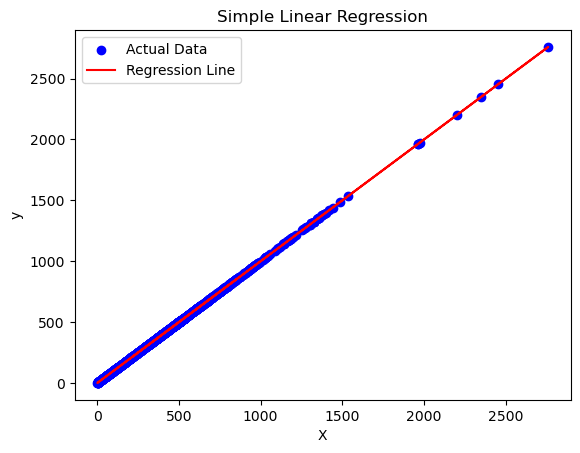

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_copy['total_claim_amount'].values.reshape(-1, 1)
y = df_copy['total_claim_amount'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [84]:
def train_and_evaluate_models(models, X_train, X_test, y_train, y_test):
    """
    Trains and evaluates a list of machine learning models.

    Args:
        models (list): List of machine learning model instances.
        X_train (numpy.ndarray): Training features.
        X_test (numpy.ndarray): Testing features.
        y_train (numpy.ndarray): Training labels.
        y_test (numpy.ndarray): Testing labels.

    Returns:
        dict: A dictionary containing model names as keys and evaluation metrics (MSE and R-squared) as values.
    """
    results = {}

    for model in models:
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[model_name] = {"MSE": mse, "R-squared": r2}

    return results

In [85]:
from sklearn.neighbors import KNeighborsRegressor

linear_reg_model = LinearRegression()
knn_model = KNeighborsRegressor(n_neighbors=3)  

models_list = [linear_reg_model, knn_model]

results = train_and_evaluate_models(models_list, X_train, X_test, y_train, y_test)

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  R-squared (R2): {metrics['R-squared']:.2f}")
    print()

LinearRegression:
  Mean Squared Error (MSE): 0.00
  R-squared (R2): 1.00

KNeighborsRegressor:
  Mean Squared Error (MSE): 18.33
  R-squared (R2): 1.00



In [86]:
def train_and_evaluate_models(models, X, y):
    """
    Trains and evaluates a list of machine learning models.

    Args:
        models (list): List of tuples containing model names and instances.
        X (numpy.ndarray): Features.
        y (numpy.ndarray): Labels.

    Returns:
        list: A list of dictionaries containing model names, evaluation metrics (MSE and R-squared), and trained models.
    """
    results = []

    for model_name, model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "model_name": model_name,
            "MSE": mse,
            "R-squared": r2,
            "model": model
        })

    return results


In [87]:
from sklearn.neural_network import MLPRegressor

models_to_try = [
    ('MLP Regressor', MLPRegressor(random_state=42))
]

results = train_and_evaluate_models(models_to_try, X, y)

for result in results:
    print(f"{result['model_name']}:")
    print(f"  Mean Squared Error (MSE): {result['MSE']:.2f}")
    print(f"  R-squared (R2): {result['R-squared']:.2f}")
    print()

MLP Regressor:
  Mean Squared Error (MSE): 0.00
  R-squared (R2): 1.00

